# House Price Prediction

# 1. Businesss Problem Understanding
## 1.1 Context
Bank ABC merupakan bank dengan fokus kredit pada kredit multiguna dengan pinjaman dengan agunan properti atau rumah tinggal. Dimana rasio dari pinjaman yang diberikan oleh bank 80% dari nilai agunan atau bangunan ini. Untuk menilai properti atau bangunan yang akan dijaminkan ke bank perlu dilakukan penilaian baik dari eksternal maupun internal. Penilaian ini memakan waktu yang tidak sebentar, karena harus dilakukan secara hati-hati dan detail. Meskipun tim penilai di sisi eksternal ditunjuk langsung oleh bank pemberi kredit, namun tidak menutup kemungkinan hasil yang dihasilkan bisa bias atau tidak sesuai dengan taksiran. Dari penilai internal juga sangat memungkinkan lamanya waktu penilaian jika jaminan atau agunan yang diajukan sangat banyak. Jika penilaian yang dilakukan terlalu tinggi maka ini akan merugikan pihak perbankan dikemudian hari jika terjadi kredit macet. Sebaliknya jika penilaian terlalu murah maka nasabah enggan mengambil kredit pada bank kami. 

## 1.2 Problem Statement 
Salah satu yang menjadi masalah dalam pemberian kredit adalah efisiensi dan efektifitas dalam penilaian atau penaksiran nilai agunan berupa rumah sebagai ukuran pemberian kredit yang bisa diberikan kepada nasabah. Pemecahan masalah ini merupakan menjadi masalah yang harus diselesaikan oleh departemen kredit guna meningkatkan efisiensi dan efektifitas dalam operasinal bisnis, hal ini ingin dicapai guna memberikan customer satisfaction terkait pelayanan pemberian kredit kepada nasabah. 

Banyaknya jenis, spesifikasi maupun lokasi rumah tinggal yang diajukan oleh nasabah, membuat harga taksiran juga sangat bervariatif. Dengan banyaknya perbedaan dari masing-masing agunan, sangat penting bagi bank untuk menilai berapa harga pasaran atau taksiran yang diajukan sebagai agunan, mengingat pemberian kredit atau plafond sangat bergantung dengan nilai agunan yang diberikan. Kecepatan dalam penaksiran inilah yang ingin dicapai oleh departement kredit untuk meningkatkan efisiensi dan efektifitas dalam pelayanan. Semakin cepat kredit diberikan kepada nasabah maka semakin cepat juga perusahaan mendapatkan profit dari bunga pinjaman tersebut. 

## 1.3 Goals
Goals yang ingin dicapai dengan dibuatnya predicting tools ini jelas ingin mempercepat waktu pemberian kredit serta mengurangi bias pada tim penilai internal. Prediksi harga yang dibuat akan mengikuti standar yang telah ditetapkan oleh bank. Hal ini bertujuan untuk memudahkan tim internal dalam pengambilan keputusan. 

## 1.4 Analytics Approach

Hal yang perlu dilakukan adalah dengan melakukan pendekatan dalam membuat model yang dapat memprediksi harga secara akurat dengan memerhatikan faktor-faktor(fitur) yang dapat memengaruhi harga rumah. Penentuan fitur juga memerhatikan korelasi dari fitur itu sendiri kita bisa memlihat fitur atau faktor apa saja yang dapat memengaruhi harga rumah tersebut. Model inilah yang dapat digunakan untuk membantu mempercepat waktu pemberian kredit pada Bank ABC.   

## 1.5 Metric Evaluation
Pada model yang dibuat nantinya akan menggunakan beberapa metrik evaluasi antara lain RMSE, MAE dan MAPE. 

**RMSE** adalah  metode pengukuran dengan mengukur perbedaan nilai dari prediksi sebuah model sebagai estimasi atas nilai yang diobservasi. Nilai RMSE didapat dari akar kuadrat Mean Square Error. 

**MAE** adalah rata-rata nilai absolut dari error, sedangkan 

**MAPE** adalah rata-rata persentase error yang dihasilkan oleh model. 

Ketiganya digunakan untuk melihat seberapa baik model dapat memprediksi data yang belum pernah dilihat atau data test. Semakin kecil nilai ketiganya, artinya model semakin akurat dalam memprediksi target atau dependent variable sesuai dengan feature yang telah digunakan.

Penggunaan **RMSE** untuk menilai akurasi model prediksi, apakah model prediksi tersebut sesuai atau tidak.

Penggunaan **MAE** dan **MAPE** lebih mudah untuk di interpretasi, dimana hasil erorr hanya akan dimutlakan untuk MAE dan untuk MAPE akan dibagi dengan data aktual. Untuk MAPE sendiri lebih fair digunakan dalam nominal rupiah karena yang dihitung nantinya adalah prosentase.


# 2. Data 

## 2.1. Data Understanding

In [1]:
# import library
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
# read dataset dan tampilkan sample dataset
df = pd.read_csv("data_california_house.csv")
display(df.head(), df.tail())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


###  Informasi tentang dataset
- Data yang digunakan merupakan data terkait dengan median harga rumah untuk daerah California. Pengambilan data atau sensus dilakukan pada tahun 1990.
- Masing-masing data merepresentasikan kriteria dan median harga rumahnya.


| **Kolom** | **Tipe Data** | **Deskripsi Fitur** |
| --- | --- | --- |
| logitude | Float | Titik koordinat pada garis bujur, semakin besar angka longitude maka semakin ke barat titik tersebut |
| latitude | Float | Titik koordinat pada garis lintang, semakin besar angka latitude maka semakin ke utara titik tersebut |
| housing_median_age | Float | Nilai median dari umur bangunan dalam radius satu block, semakin besar angkanya maka semakin tua bangunan tersebut |
| total_rooms | Float | Banyaknya atau total ruangan dalam radius satu block |
| total_bedrooms | Float | Banyaknya atau total kamar tidur dalam radius satu block |
| population | Float | Banyaknya atau total populasi yang tinggal dalam radius satu block |
| households | Float | Banyaknya rumah tangga yang tinggal dalam satu bangunan pada radius satu block |
| median_income | Float | Nilai median pendapatan tiap household secara kumulatif dalam radius satu block(satuan USD) |
| ocean_proximity | Object | Lokasi atau jarak rumah relatif terhadap laut atau pesisir |
| median_house_value | Float | Nilai median harga rumah atau bangunan untuk tiap household dalam radius satu block(satuan USD) |

## 2.2. Exploratory Data Analysis

EDA dilakukan untuk melihat pola atau insight yang ada pada data secara mendetail. EDA juga dapat memberikan informasi terkait bagaimana kelengkapan data yang digunakan, apakah terdapat missing value pada data serta juga dapat melihat bagimana distribusi data yang dimiliki. Secara garis besar EDA merupakan langkah awal ketika kita akan melakukan prediksi terhadap sesuatu.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [4]:
# Menampilkan informasi pada dataset
sample = []
jumlah = []
tipe = []
nan = []
for i in df.columns:
    sample.append(df[i].unique())
    jumlah.append(df[i].nunique())
    tipe.append(df[i].dtype)
    nan.append(df[i].isna().sum())
    
pd.DataFrame({
    "Column" : df.columns,
    "Unique Value" : sample,
    "Number of Unique" : jumlah, 
    "dtype" : tipe,
    "Null" : nan
    
})

,Column,Unique Value,Number of Unique,dtype,Null
0,longitude,"[-119.79, -122.21, -118.04, -118.28, -119.81, ...",806,float64,0
1,latitude,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6...",836,float64,0
2,housing_median_age,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0...",52,float64,0
3,total_rooms,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0...",5227,float64,0
4,total_bedrooms,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14...",1748,float64,137
5,population,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ...",3498,float64,0
6,households,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14...",1649,float64,0
7,median_income,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8...",9797,float64,0
8,ocean_proximity,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]",5,object,0
9,median_house_value,"[47500.0, 100000.0, 285800.0, 175000.0, 59200....",3548,float64,0


Secara umum, informasi di atas menunjukan bahwa dataframe atau dataset yang digunakan memuat informasi sebagai berikut:
1. Memilki 10 kolom dengan 9 kolom data numerical dan 1 kolom data categorical.
2. Terdapat 14.448 baris data.
3. Data numerikal pada dataset ini meliputi kolom `housing_median_age`, `total_rooms`, `total_bedrooms`, `households`,`population`, `median_income` dan `median_house_value` yang memiliki nilai positif dengan rentang nilai tertentu. 
4. Data numerikal lainnya adalah kolom `longitude` dan `latitude` yang memuat data spatial atau menujukan lokasi atau titik koordinat.
5. Data kategorikal pada dataset ini adalah kolom `ocean_proximity` yang memuat informasi lokasi bangunan dengan membagi ke beberapa kategori tergantung dengan kedekatan dengan garis pantai.

### 2.2.1. Missing Value

In [5]:
# melihat apakah ada missing value pada dataset 
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Dari informasi dataset diatas dapat dilihat bahwa terdapat mising value pada kolom `total_bedrooms`. Kemudian setelah dilakukan pengecekan missing value, terdapat sebanyak 137 missing value. Kita akan melakukan pengecekan distribusi pada kolom `total_bedrooms` sebagai landasan penanganan atau handling missing value pada kolom tersebut. 

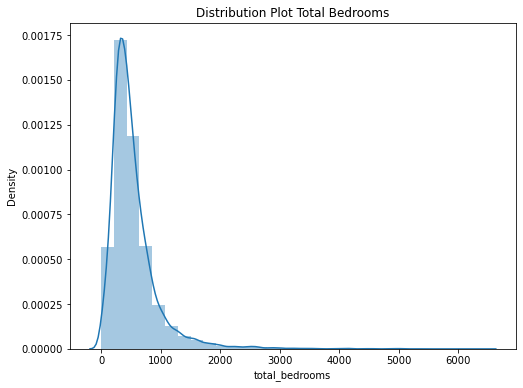

In [6]:
# plot distribusi data total bedrooms
plt.figure(figsize=(8,6))
sns.distplot(df["total_bedrooms"],bins=30)
plt.title("Distribution Plot Total Bedrooms")
plt.show()

Dari plot distribusi terlihat bahwa data total bedrooms tidak berdistribusi normal, dan cenderung negatif skewed atau right skewed, maka mising value pada kolom ini akan diisi dengan nilai median atau nilai tengah. 

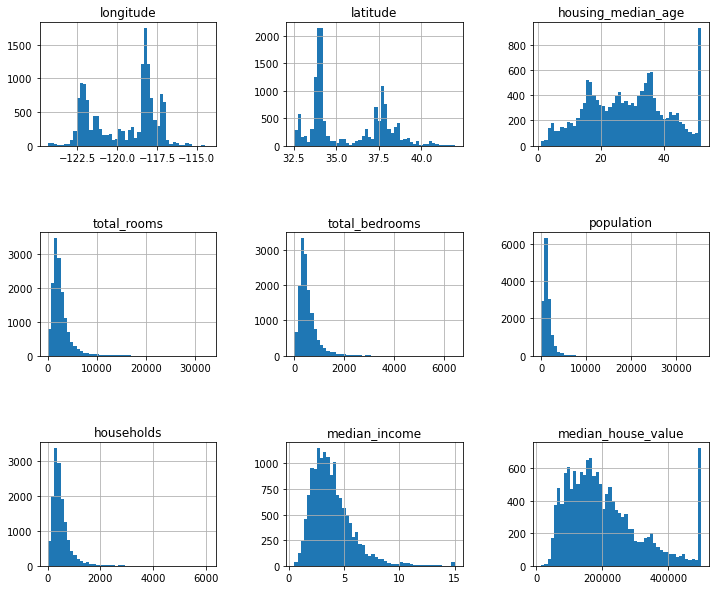

In [7]:
# Menampilkan plot distribusi semua data numerical pada dataset
df.hist(figsize=(12, 10), bins=50)
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

Visualiasi di atas merupakan data disrtibusi data numerik yang ada. Data menunjukan bahwa sebagian besar data memiliki negatif skewed atau right skewed kecuali longitude dan latitude. Kolom median_house_value dan housing_median_age secara umum memiliki data yang bersifat ekstrem atau sering disebut outliers.
* Nilai median house value memiliki nilai outliers pada harga tertinggi karena kita juga memiliki kategori ocean proximity yang berhubungan dengan kedekatan lokasi rumah dengan pantai. Hal lain yang mungkin terjadi adalah rumah atau bangunan dengan harga diatas harga tertentu masuk kedalam satu kelompok kategori.
* Nilai median house age juga memiliki nilai outlies pada umur bangunan yang tinggi, bisa dilihat pada data dengan umur bangunan di atas 50 tahun. 
* total_rooms, total_bedrooms, population, household, median_income juga terlihat memiliki outliers.

### 2.2.2. Duplicate Data

In [8]:
# cek data duplikat 
df.duplicated().sum()

0

Tidak terdapat data duplikat pada dataset yang digunakan. 

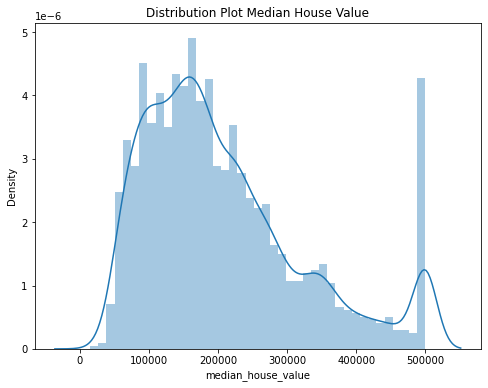

In [9]:
# plot distribusi data target (median_house_value)
plt.figure(figsize=(8,6))
sns.distplot(df["median_house_value"])
plt.title("Distribution Plot Median House Value")
plt.show()

Dapat dilihat pada grafik distribusi bahwa data `median_house_value` memiliki distribusi data yang right skewed atau positif skewed. Hal tersebut juga yang mendasari penggunaan nilai median pada setiap data, Nilai median lebih bisa merepresentasikan data yang memiliki distribusi data tidak normal. Pada model yang akan dibuat kita akan meminimalisir adanya data outliers agar model yang dibuat dapat lebih akurat namun ketika kita menghapus data outlier kita akan mendapatkan limitasi pada model, model tidak menjamin hasil prediksi yang baik diluar rentang data yang digunakan. 

### 2.2.3. Numerical Features

In [10]:
# describe data numerical
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Secara keseluruhan tidak ada feature yang bernilai negatif pada deskripsi data kecuali pada fitur longitude. 

### 2.2.4. Categorical Feature

In [11]:
# describe data kategorical
df.describe(include="O")

,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


Terdapat 5 unique value pada kategori ocean_proximity dengan data yang mendominasi adalah data dengan kategori 1<H OCEAN, diikuti dengan INLAND, NEAR OCEAN, NEAR BAY dan paling sedikit ISLAND.

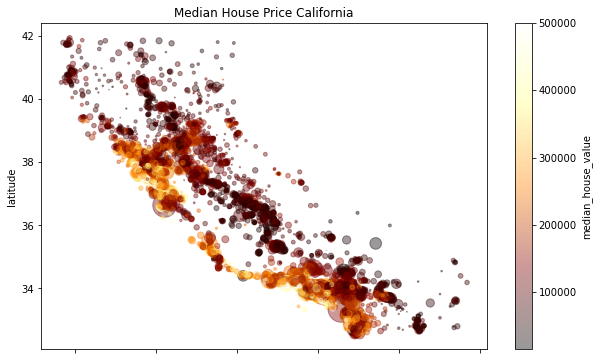

In [13]:
# plot longitude dan latitude berdasarkan median_house_value
df.plot(kind="scatter",
        x="longitude",
        y="latitude",
        alpha=0.4,
       s = df["population"]/50, 
       c = "median_house_value",
       cmap='afmhot',
       colorbar=True, figsize=(10,6))
plt.title("Median House Price California")
plt.show()

In [16]:
# cek median house value untuk setiap Ocean Proximity
df_median_value = df.groupby(by=["ocean_proximity"]).agg({"median_house_value":"median"}).reset_index()
df_median_value.set_index("ocean_proximity").sort_values("median_house_value", ascending=False)

,median_house_value
ocean_proximity,
ISLAND,351100.0
NEAR BAY,230800.0
NEAR OCEAN,228600.0
<1H OCEAN,214800.0
INLAND,108800.0


Pada grafik scatterplot yang diatas kita bisa melihat bahwa rumah-rumah dengan lokasi yang dekat dengan garis pantai cenderung memiliki harga yang lebih tinggi daripada yang berada jauh dari garis pantai. Hal tersebut juga dikonfirmasi dengan melihat nilai median house value yang dikelompokan berdasarkan kategori ocean_proximity. 

In [14]:
op = pd.DataFrame(df["ocean_proximity"].value_counts()).reset_index()
op 

,index,ocean_proximity
0,<1H OCEAN,6369
1,INLAND,4576
2,NEAR OCEAN,1879
3,NEAR BAY,1622
4,ISLAND,2


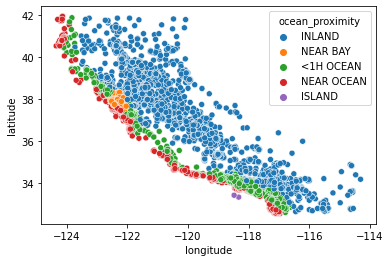

In [17]:
# plot lokasi ocean proximity
sns.scatterplot(data=df, x="longitude", y="latitude", hue="ocean_proximity")
plt.show()

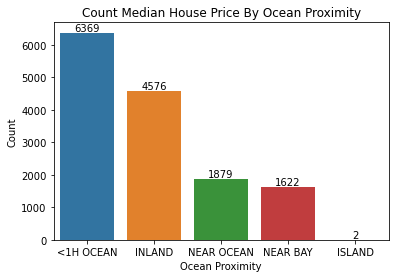

In [15]:
# visualiasi data kategorikal 
ax = sns.barplot(y=op["ocean_proximity"], x=op["index"])
ax.bar_label(ax.containers[0])
plt.title("Count Median House Price By Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Count")
plt.show()

Untuk data dengan kategori ISLAND akan dimasukan kedalam kategori NEAR OCEAN karena data dengan kategori yang terlalu sedikit akan bermasalah pada saat proses modeling. Lebih jelasnya pada proses spliting data, data yang terlalu sedikit bisa saja hanya ada pada data train namun tidak ada pada data test, vice versa.

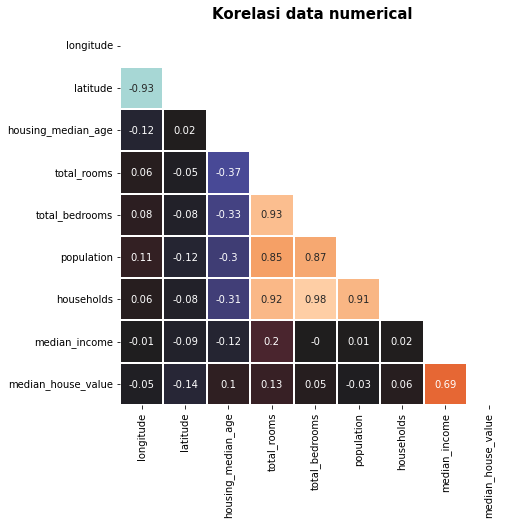

In [25]:
# Korelasi dari data numerical 
corr_mat = df.corr().round(2)

f, ax = plt.subplots(figsize=(7,7))
masking = np.zeros_like(corr_mat,dtype=np.bool)
masking[np.triu_indices_from(masking)] = True
sns.heatmap(corr_mat,mask=masking,vmin=-1,vmax=1,center=0,square=False,lw=2,annot=True,cbar=False);
plt.title("Korelasi data numerical ", fontsize = 15 , fontweight = 'bold')
plt.show()

## 2.3. Data Preprocessing

Pada proses ini kita akan melakukan cleaning data yang nanti akan digunakan pada modeling dan analisis ketika data sudah clean. Hal yang dapat dilakukan adalah dengan:
- Melakukan drop untuk fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan handling terhadap missing value jika dirasa dapat di handling. Jika missing value tidak menjadi masalah kita bisa melakukan drop mising value. Tergantung bagiamana kasus yang ditemukan. 

Untuk prosesnya kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya. 

In [18]:
# Membuat duplikasi dataframe
df_duplicate = df.copy()

In [19]:
# memasukan salah satu kelompol minoritas pada ocean proximity
df_duplicate["ocean_proximity"]= df_duplicate["ocean_proximity"].apply(lambda x : "NEAR OCEAN" if x == "ISLAND" else x)

In [20]:
df_duplicate.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Dapat dilihat bawah terdapat null value atau missing value pada kolom atau feature total_bedrooms, observasi lanjutan terkait data dilakukan guna mengetahui handling apa yang cocok untuk dataset diatas.

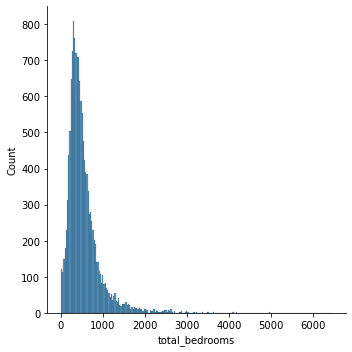

In [21]:
# cek distibusi kolom total bedrooms
sns.displot(df["total_bedrooms"])
plt.show()
# missing value pada kolom total_bedroom akan di isi dengan nilai median dengan menggunakan simple imputer

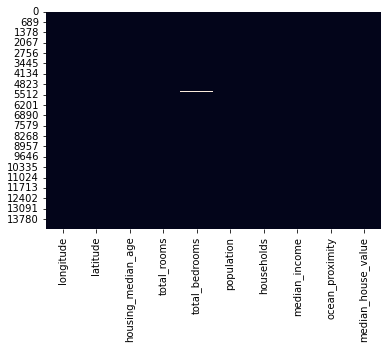

In [22]:
# Missing value heatmap
sns.heatmap(df_duplicate.isnull(), cbar=False);

In [23]:
# clean dataset
df_duplicate.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Missing value yang ditemui pada dataset hanya ada pada kolom total_bedrooms, ini akan di isi dengan metode simple imputer pada saat modeling. 

In [26]:
df_duplicate.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
df_duplicate.describe(include="O")

,ocean_proximity
count,14448
unique,4
top,<1H OCEAN
freq,6369


In [28]:
# clean dataset 
df_duplicate.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


### Pengecekan outliers
Di awal kita sudah menyinggung bahwa kolom median house value dan median house age secara umum terlihat memiliki outliers. Di sini kita akan mengecek outliers tersebut. Banyaknya outliers pada data akan memengaruhi model yang dibuat dan analisis. Namun handling pada outliers juga perlu dilakukan dengan hati-hati karena harus sesuai dengan tujuan bisnis ataupun domain knowlegde. Pada pemodelan kali ini kita ingin membuat model prediksi yang robust dan memiliki residual erorr yang rendah, maka penghapusan outliers jadi salah satu cara dalam pembuatan model yang diinginkan. 

In [29]:
# fungsi pengecekan ouliers
def check_out(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3 - q1
    print(f'IQR :{IQR}')
    batas_bawah = q1 - (1.5 * IQR)
    batas_atas = q3 + (1.5 * IQR)
    print(f'batas_bawah : {batas_bawah}')
    print(f'batas_atas : {batas_atas}')

In [30]:
column_ = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'] 

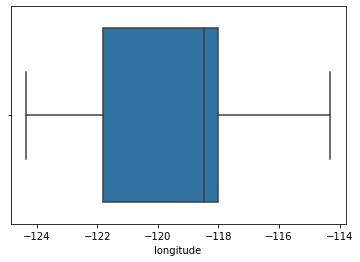

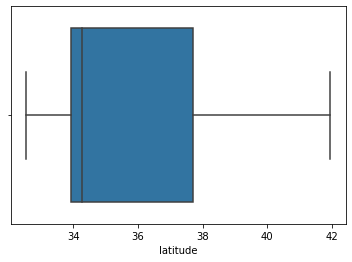

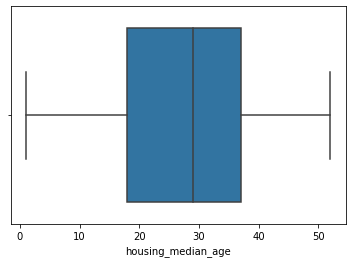

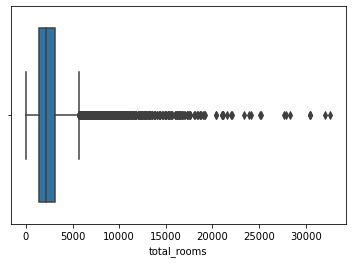

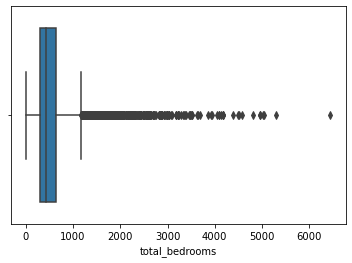

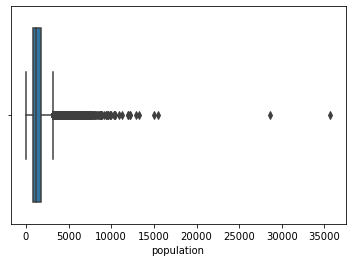

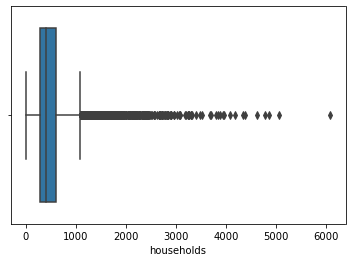

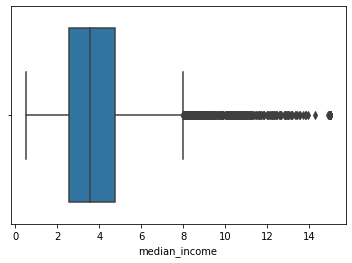

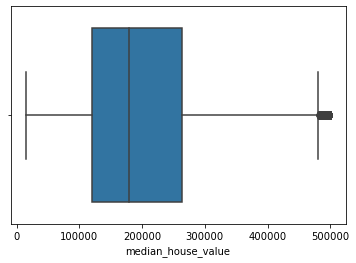

In [31]:
column_ = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'] 
for column in column_:
    plt.figure()
    sns.boxplot(data= df_duplicate, x = column)
    plt.show()

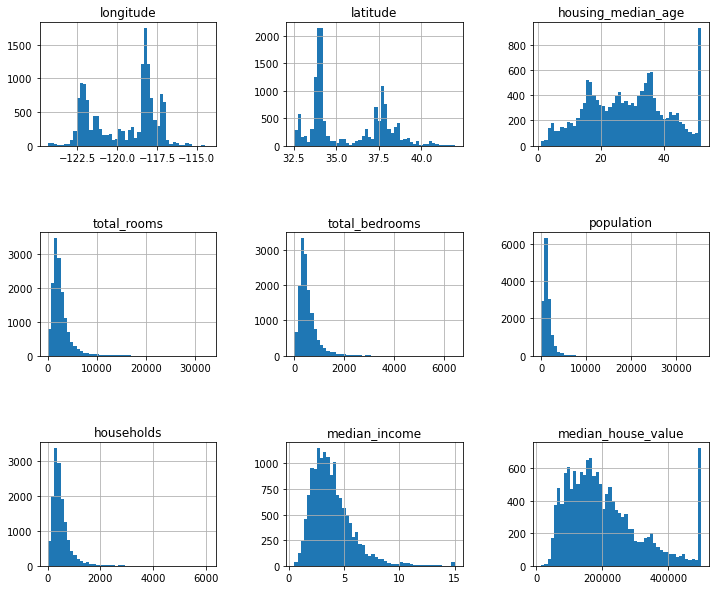

In [32]:
df_duplicate.hist(figsize=(12, 10), bins=50)
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

Penghapusan nilai outliers didasarkan pada plot distribusi yang ada pada histogram di atas dan pada boxplot, nilai yang dianggap terlalu ekstrim atau dapat memengaruhi error pada model akan dihapus.

In [33]:
# drop outliers
df_no_out = df_duplicate[df_duplicate["housing_median_age"] <= 50] # data dengan housing median age di atas 50 tahun akan dihapus
df_no_out = df_no_out[df_no_out["total_rooms"] <= 10000] # data dengan total rooms di atas 50000 akan dihapus
df_no_out = df_no_out[df_no_out["total_bedrooms"] <= 2000] # data dengan total bedrooms di atas 2000 akan di hapus
df_no_out = df_no_out[df_no_out["population"] <= 6000] # data dengan population di atas 10000 akan dihapus 
df_no_out = df_no_out[df_no_out["households"] <= 2000] # data dengan househhold di atas 2000 akan dihapus
df_no_out = df_no_out[df_no_out["median_income"] <= 10] # data dengan median_income di atas 10 USD akan dihapus
df_no_out = df_no_out[df_no_out["median_house_value"] <= 500000] # data dengan median house valu 500000 USD akan dihapus

Drop outlier ini juga membuat limitasi pada model yang dibuat:
* Umur bangunan maksimmal adalah 50 tahun 
* Total rooms paling banyak dalam satu blok adalah 10000
* Total bedrooms maksimal dalam satu blok adalah 2000
* Total population dalam satu blok maksimal 6000
* Total household dalam satu blok maksimal 2000
* Median income paling banyak dalam satu blok adalah 10 USD
* Median house value paling banyak adalah 500.000 USD

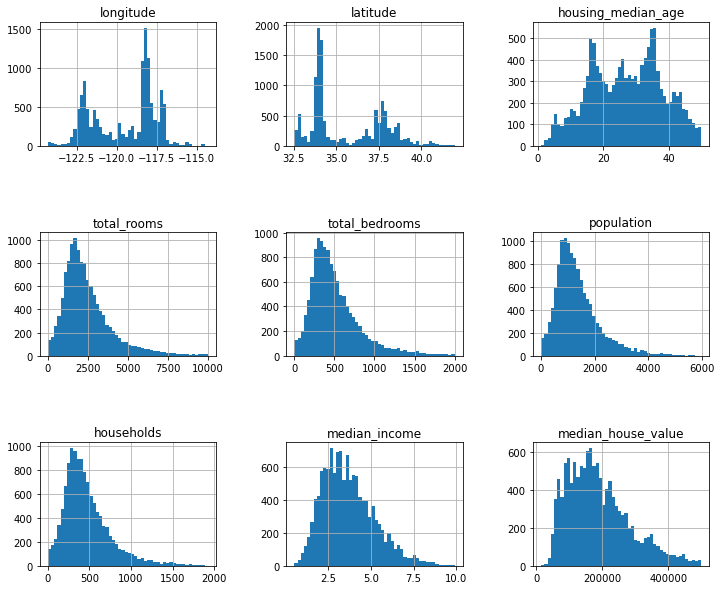

In [34]:
df_no_out.hist(figsize=(12, 10), bins=50)
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

Dapat dilihat bahwa data sudah tidak memiliki banyak outliers

In [35]:
df_no_out.reset_index(drop=True, inplace=True)

In [36]:
# Dataset clean dengan handling outliers
df_clean_no_out = df_no_out.copy()

# 3. Modelling

In [37]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## 3.1. Encoding

Fitur yang digunakanan dalam model machine learning harus berupa angka numerika, maka fitur-fitur yang masih berupa categorical harus kita transform ke dalam data numerikal. Kita akan menggunakan ColumnTransformer untuk mengubah tipe data categorical menjadi numerikal, kolom yang akan di encode adalah `ocean_proximity`. ColumnTransformer ini nantinya akan di gunakan dalam pipeline model.

In [38]:
# mengubah fitur kategorical menjadi numerikal dengan menggunakan column transformer
transformer = ColumnTransformer([
    ("input", SimpleImputer(strategy="median"), ["total_bedrooms"]),
    ("ohe_ocean", OneHotEncoder(drop="first"), ["ocean_proximity"])
], remainder="passthrough")

<IPython.core.display.Javascript object>

## 3.2. Splitting Data

In [39]:
# Memisahkan data features dengan target
x = df_clean_no_out.drop(columns="median_house_value") # target 
y = df_clean_no_out["median_house_value"] # feature 

In [40]:
# Splitting data training dan test
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, # test size 20%
                                                    random_state=1)

## 3.3. Memilih Model Benchmark

In [41]:
# Define algoritma yang digunakan 
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
ridge = Ridge()
lasso = Lasso()
svr = LinearSVR()


models = [lr, knn, dt, rf, xgb, ridge, lasso, svr]

model_log = []
for i in models:
    model_log.append(TransformedTargetRegressor(i, func=np.log, inverse_func=np.exp)) # Transform target 
    

# scaling data
scaler = StandardScaler()

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in model_log:
    skfold = StratifiedKFold(n_splits=5)
    
    estimator = Pipeline([
        ("preprocess", transformer),
        ("scaling", scaler),
        ("model", i)
    ])
    
    #RMSE 
    model_cv_rmse = cross_val_score(estimator, x_train, y_train, cv=skfold, scoring="neg_root_mean_squared_error")
    print(model_cv_rmse, i)
    
    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())
    
    #MAE 
    model_cv_mae = cross_val_score(estimator, x_train, y_train, cv=skfold, scoring="neg_mean_absolute_error")
    print(model_cv_mae, i)
    
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())
    
    #MAPE 
    model_cv_mape = cross_val_score(estimator, x_train, y_train, cv=skfold, scoring="neg_mean_absolute_percentage_error")
    print(model_cv_mape, i)
    
    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[-59545.79470907 -60879.38313951 -59935.32605632 -59895.93076407
 -59264.16565858] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-42104.00131324 -41759.53199386 -41489.70208937 -41746.27554511
 -41721.21591267] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.24110579 -0.24631789 -0.23661658 -0.23465801 -0.23691862] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())


<IPython.core.display.Javascript object>

[-54436.50827805 -56333.30922729 -56321.52505014 -56910.87603906
 -55099.99657961] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-37576.03768761 -37621.46801268 -37784.27686846 -38692.00217334
 -37474.57099776] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.21242628 -0.21508919 -0.21327226 -0.21259049 -0.20640715] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())


<IPython.core.display.Javascript object>

[-64015.65263348 -66242.05381803 -64901.9417643  -64100.65555272
 -66127.35341286] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))
[-42627.66218905 -43263.63233831 -42981.34328358 -43268.40845771
 -44231.65853659] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))
[-0.24371425 -0.25931943 -0.2531273  -0.24674445 -0.25020666] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))


<IPython.core.display.Javascript object>

[-46930.72564334 -48367.72492376 -48279.41652262 -46126.01791369
 -47064.10526056] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))
[-31249.57380591 -31128.19658838 -30969.44993641 -30129.84037424
 -30926.0736536 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))
[-0.17387316 -0.18085848 -0.17563978 -0.1670483  -0.1699683 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))


<IPython.core.display.Javascript object>

[-44597.68732335 -47290.00965341 -45831.23392571 -44834.3731872
 -43702.30564098] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, gpu_id=None,
                                                  grow_policy=None,
                                         

<IPython.core.display.Javascript object>

[-59551.17848613 -60876.47653016 -59932.02939956 -59898.67117718
 -59265.06036891] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge())
[-42107.55192336 -41758.84746406 -41490.00401519 -41746.68735786
 -41722.39447876] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge())
[-0.24111597 -0.24631667 -0.23660926 -0.23465403 -0.23691881] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge())


<IPython.core.display.Javascript object>

[-101282.33649606  -98882.33837809  -96918.34503583  -97153.72682827
  -97078.62653351] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso())
[-77329.3597564  -75814.82404936 -73961.21826348 -73355.96612673
 -73840.54887505] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso())
[-0.48974055 -0.49794987 -0.47708666 -0.46714217 -0.47865951] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Lasso())


<IPython.core.display.Javascript object>

[-59875.79720336 -61429.79584293 -60182.33144163 -60165.34060677
 -59628.28306897] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearSVR())
[-41860.79785773 -41711.19640972 -41258.34964137 -41396.89896718
 -41824.75183193] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearSVR())
[-0.23681449 -0.24321789 -0.23289167 -0.23032333 -0.23352301] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearSVR())


In [42]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', "Ridge", "Lasso", "SVR"],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-59904.120066,545.915313,-41764.145371,196.471234,-0.239123,0.004166
1,KNN Regressor,-55820.443035,909.667803,-37829.671148,442.594630,-0.211957,0.002931
2,DecisionTree Regressor,-65077.531436,956.132143,-43274.540961,533.038025,-0.250622,0.005382
3,RandomForest Regressor,-47353.598053,855.005649,-30880.626872,392.695280,-0.173478,0.004753
4,XGBoost Regressor,-45251.121946,1224.179829,-29861.127137,548.024858,-0.169323,0.006801
5,Ridge,-59904.683192,543.920800,-41765.097048,197.561637,-0.239123,0.004168
6,Lasso,-98263.074654,1669.808212,-74860.383414,1491.216479,-0.482116,0.010680
7,SVR,-60256.309633,621.293022,-41610.398942,240.136568,-0.235354,0.004443


Berdasarkan hasil di atas kita akan memilih dua model terbaik yang akan di test pada data test, untuk model yang dipilih XGBoost Regressor dan Random Forest Regressor. 

### 3.3.1. Predict Test Set ke Benchmark Model

In [43]:
# Benchmark 2 model terbaik
xgb = XGBRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
models = [xgb, rf]

scaler = StandardScaler()

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaling',scaler), 
        ('model',i)
        ])

    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'Model': ["XGB", "RandomForest"],'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape})
score_before_tuning

,Model,RMSE,MAE,MAPE
0,XGB,42617.739035,29342.395211,0.172185
1,RandomForest,43449.213179,29658.212503,0.173131


Setelah dilakukan pengujian pada data test model yang akan dipilih untuk dituning adalah model XGBoost, model XGBoost memiliki nilai RMSE, MAE dan MAPE yang lebih rendah dari Model Random Forest. Maka model yang akan dipilih untuk dilakukan tuning adalah XGboost Regressor.

In [44]:
# test model terbaik dengan data test
xgb = XGBRegressor(random_state=1)

score_rmse = []
score_mae = []
score_mape = []

estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaling', scaler),
        ('model',xgb)
        ])
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

In [45]:
# hasil sebelum dituning 
score_before_tuning = pd.DataFrame({'Model': "XGB",'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape})
score_before_tuning

,Model,RMSE,MAE,MAPE
0,XGB,42617.739035,29342.395211,0.172185


## 3.4. Hyperparameter Tuning

In [61]:
# melihat paramter yang digunakan
estimator.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('input', SimpleImputer(strategy='median'),
                                    ['total_bedrooms']),
                                   ('ohe_ocean', OneHotEncoder(drop='first'),
                                    ['ocean_proximity'])])),
  ('scaling', StandardScaler()),
  ('model',
   XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_constraints='', learning_rate=0.300000012, max_bin=256,
                max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
                max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
 

In [50]:
# membuat kombinasi parameter untuk tuning
hyperparam_space = [
    {"model__learning_rate" : [0,1, 0.2, 0.3, 0.4, 0.5], 
     "model__n_estimators" : [100, 200, 1000], 
     "model__max_depth" : [4,5,6,7], 
     "model__gamma" : [0,1,2,3]}]

In [51]:
# melakukan tuning dengan menggunakan GridSearchCV
grid = GridSearchCV(estimator,
                    param_grid = hyperparam_space,
                    cv = skfold,
                    scoring = "neg_root_mean_squared_error",
                    n_jobs = -1)

In [52]:
# fitting kembali data dengan data train dan test
grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('input',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['total_bedrooms']),
                                                                        ('ohe_ocean',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['ocean_proximity'])])),
                                       ('scaling', StandardScaler()),
                                       ('model',
                                        XGBRegress...
                                                     max_depth=6, max_leaves=0,
                                                     min_child_weight=1,
                                                     missing=nan,
                                                     monotone_constraints='()',
                                                     n_estimators=100, n_jobs=0,
                                                     num_parallel_tree=1,
                                                     predictor='auto',
                                                     random_state=1, ...))]),
             n_jobs=-1,
             param_grid=[{'model__gamma': [0, 1, 2, 3],
                          'model__learning_rate': [0, 1, 0.2, 0.3, 0.4, 0.5],
                          'model__max_depth': [4, 5, 6, 7],
                          'model__n_estimators': [100, 200, 1000]}],
             scoring='neg_root_mean_squared_error')

In [53]:
# tampilkan hasil parameter berdasarkan ranking
pd.DataFrame(grid.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__gamma,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
179,24.374649,0.084263,0.123557,0.003194,2,0.2,7,1000,"{'model__gamma': 2, 'model__learning_rate': 0....",-43807.180750,-44945.055455,-45097.538874,-44595.027274,-42918.671525,-44272.694776,810.730187,1
251,24.121682,0.193489,0.124652,0.007128,3,0.2,7,1000,"{'model__gamma': 3, 'model__learning_rate': 0....",-43814.051048,-44946.815447,-45097.538874,-44595.027274,-42918.672419,-44274.421013,810.237054,2
107,25.677816,0.085327,0.130650,0.005580,1,0.2,7,1000,"{'model__gamma': 1, 'model__learning_rate': 0....",-43807.180750,-44945.055455,-45111.982664,-44595.027274,-42918.671525,-44275.583533,813.684439,3
35,32.114611,2.480895,0.155762,0.015959,0,0.2,7,1000,"{'model__gamma': 0, 'model__learning_rate': 0....",-43807.180752,-44945.055455,-45111.982664,-44595.027274,-42918.671525,-44275.583534,813.684439,4
106,5.598235,0.244814,0.036265,0.004818,1,0.2,7,200,"{'model__gamma': 1, 'model__learning_rate': 0....",-43923.721395,-44821.088611,-45033.627708,-44695.801367,-43035.437428,-44301.935302,735.810714,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2.241916,0.104827,0.023490,0.006088,1,0,5,100,"{'model__gamma': 1, 'model__learning_rate': 0,...",-215067.213076,-211569.172486,-209546.190709,-210287.149520,-210355.681146,-211365.081388,1961.459736,241
74,17.553062,0.186653,0.080445,0.013171,1,0,4,1000,"{'model__gamma': 1, 'model__learning_rate': 0,...",-215067.213076,-211569.172486,-209546.190709,-210287.149520,-210355.681146,-211365.081388,1961.459736,241
73,3.628742,0.077871,0.024546,0.001426,1,0,4,200,"{'model__gamma': 1, 'model__learning_rate': 0,...",-215067.213076,-211569.172486,-209546.190709,-210287.149520,-210355.681146,-211365.081388,1961.459736,241
227,29.510390,4.994936,0.243512,0.208384,3,0,7,1000,"{'model__gamma': 3, 'model__learning_rate': 0,...",-215067.213076,-211569.172486,-209546.190709,-210287.149520,-210355.681146,-211365.081388,1961.459736,241


In [54]:
# tampikan parameter terbaik 
grid.best_params_

{'model__gamma': 2,
 'model__learning_rate': 0.2,
 'model__max_depth': 7,
 'model__n_estimators': 1000}

In [55]:
# fitting kembali data dengan best estimator
tune_estimator = grid.best_estimator_

In [56]:
tune_estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('input',
                                                  SimpleImputer(strategy='median'),
                                                  ['total_bedrooms']),
                                                 ('ohe_ocean',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('scaling', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode...
                              feature_types=None, gamma=2, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='', learning_rate=0.2,
                              max_bin=256, max_cat_threshold=64,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=7, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=1, ...))])

### 3.4.1. Predict ke data test setelah dituning

In [57]:
# test kembali pada data test
score_rmse = []
score_mae = []
score_mape = []

y_pred_tune = tune_estimator.predict(x_test)
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_tune)))
score_mae.append(mean_absolute_error(y_test, y_pred_tune))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred_tune))

In [58]:
# skor setelah dituning 
score_after_tuning = pd.DataFrame({'Model': "XGB",'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape})
score_after_tuning

,Model,RMSE,MAE,MAPE
0,XGB,42070.975066,28487.325706,0.168043


Model mengalami improvement kurang lebih sebesar 0.4 %:
* MAPE sebelum tunning 0.172185
* MAPE setelah tunning 0.168043

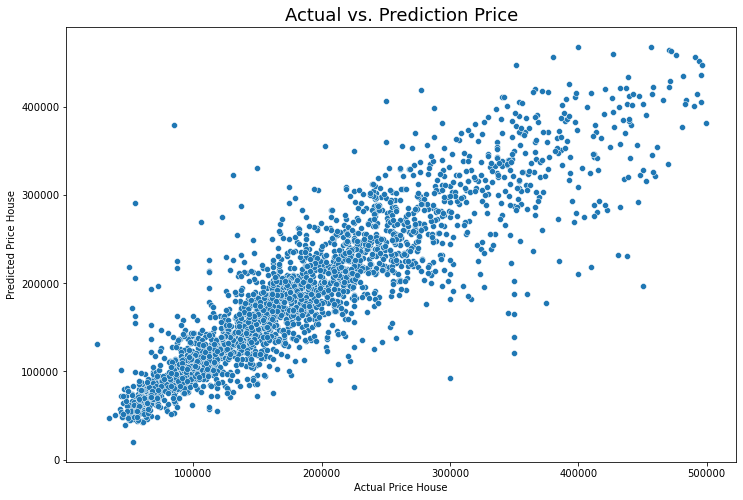

In [59]:
# Plot actual dan predited price 
plt.figure(figsize=(12, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_tune)
plt.title("Actual vs. Prediction Price", size= 18)
plt.ylabel("Predicted Price House")
plt.xlabel("Actual Price House")
plt.show()

Pada grafik scatterplot yang ditampilkan di atas antara actual price pada sumbu x dengan prediction price di sumbu menunjukkan bahwa data-data sudah cukup membentuk garis lurus atau pola yang linear yang menjukan bahwa hasil prediksi cukup mendekati nilai aktual price. Namun masih dapat dilihat juga bahwa masih terdapat nilai-nilai yang jauh dari pola linear atau tersebar secara acak.

## 3.5. Feature Importances
Pada penelitian ini, variabel atau fitur yang penting dalam pemodelan dalam memprediksi harga rumah dapat dilihat pada grafik di bawah.

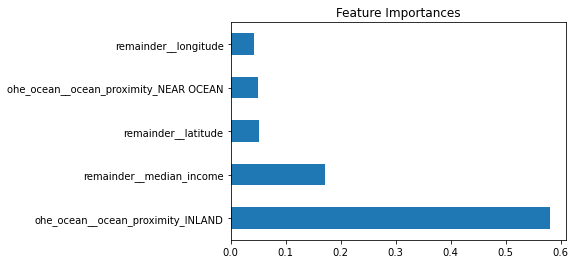

In [60]:
# Plot feature importances
feature_imp = pd.Series(tune_estimator['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending=False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

Pada feature Importance dapat dilihat bahwa ada 5 feature yang memiliki pengaruh terhadap model, yang paling besar adalah `ocean_proxixmity(INLAND)` diikuti dengan `median_income`, `latitude`, `ocean_proximity(NEAR OCEAN)` dan `longitude`

# 4. Conclusion

Kesimpulan dari pemodelan yang telah dilakukan, feature yang paling berpengaruh adalah `ocean_proximity(INLAND)` dan `median_income`. Hal ini juga bisa di lihat dari EDA ada corelation matrix bahwa median income punya korelasi yang tinggi terharap median_house_value. 
Metrik yang digunakan dalam model untuk melihat seberapa akurat model dalam memprediksi harga adalah dengan RMSE, MAE & MAPE. Ketika kita melihat nilai MAPE yang sudah dilakukan tuning, dihasilkan angka sebesar 16,8% persen. Berarti ketika kita memprediksi harga sebuah rumah pada rentang data yang telah ditentukan, maka prediksi harga akan meleset lebih atau kurang dari 16,8%. Nilai ini dianggap wajar ketika kita akan memprediksi harga rumah dengan nilai tinggi, penggunaan MAPE juga lebih fair karena menghitung presentase bukan nilai mutlak. 

Namun, tidak menutup kemungkinan kemungkinan ketika model akan memprediksi dengan tidak akurat dan meleset jauh dari nilai aktual, karena bisa terjadi bisa pada model karena terbatasnya fitur yang digunakan. Melakukan prediksi diluar limitasi yang telah ditentukan juga memungkinkan model akan memprediksi dengan tidak akurat. 


### Model yang dipilih (XGBoost)

Model yang dipilih adalah model XGBoost, karena model ini memiliki evaluasi metrik paling baik. Konsep ensemble dengan boosting bekerja melalui persiapan kumpulan model secara berurutan dan kemudian menggabungkan seluruh model untuk membuat harapan, model berikutnya mendapatkan keuntungan dari kesalahan model sebelumnya.

Algoritma XGBoost berbasis decision tree. Secara garis besar model ini bekerja dengan membangun satu tree model dengan menyesuaikan data, kemudian tree model berikutnya dibangun untuk mengurangi residual (error) dengan memberikan pembobotan(weight) pada data dengan prediksi yang salah. Proses evaluasi ini dilakukan sampai dengan instruksi yang diberikan berakhir. Hasil tiap pohon keputusan kemudian akan dilakukan majority voting untuk menentukan final prediksi. 

Pada dasarnya, algoritma ini sama dengan algoritma gradient boost hanya saja menggunakan beberapa proses tambahan sehingga lebih powerful. Proses tersebut adalah pemangkasan, newton boosting, dan parameter pengacakan ekstra. Proses pemangkasan atau penyusutan proporsional simpul daun digunakan untuk meningkatkan generalisasi model. proses newton boosting adalah proses untuk menyediakan rute langsung sehingga tidak memerlukan penurunan gradient. Proses pengacakan parameter bertujuan untuk mengurangi korelasi antar tree sehingga dapat meningkatkan kekuatan algoritma ensemble. 

# 5.  Recommendation 

Untuk mengukur seberapa efektif pengaplikasian model pada masalah bisnis, kita perlu melakukan A/B testing pada kasus ini, untuk melihat bagaimana kinerja divisi kredit atau seberapa cepat pemberian kredit diberikan pada waktu tertentu sebelum menggunakan model dengan sesudah menggunakan model.

Rekomendasi yang dapat diberikan dalam pembuatan model kedepannya adalah:
1. Dapat menambah fitur-fitur yang memiliki hubungan atau korelasi yang kuat dengan harga rumah. Seperti Akses jalan(lebar jalan), luas tanah, luas bangunan, nilai pajak tanah dan bangunan, daya listrik. 
2. Perhatikan juga fitur-fitur yang memiliki hubungan dengan lingkungan seperti seberapa dekat dengan sekolah, pasar, pelayanan kesehatan, taman kota, dan lain-lain. Karena rumah dengan akses yang lebih mudah serta dekat dengan tempat-tempat strategis akan memiliki nilai yang lebih tinggi. 
3. Membedakan rumah-rumah yang masuk dalam cluster(perumahan) dengan yang tidak. 
4. Update dan tambah dengan data-data yang baru dan relevan dengan daerah tempat kantor melakukan operasional, penambahan data baru juga bisa diikuti dengan percobaan pada model-model lain yang lebih bisa mengeneralisasi data. 
5. Mungkin jika diperlukan bisa dibuat model lanjutan yang berkaitan dengan berapa jumlah plafond atau kredit yang dapat diterima oleh nasabah. 


### Save Model

In [63]:
model_xgb_final = grid.best_estimator_
model_xgb_final.fit(x, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('input',
                                                  SimpleImputer(strategy='median'),
                                                  ['total_bedrooms']),
                                                 ('ohe_ocean',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('scaling', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode...
                              feature_types=None, gamma=2, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='', learning_rate=0.2,
                              max_bin=256, max_cat_threshold=64,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=7, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=1, ...))])

In [64]:
# Save model
import pickle

pickle.dump(model_xgb_final, open('Model_House_Final.sav', 'wb'))

In [ ]:
# # Load model
# filename = 'Model_House_Final.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))